# Data fields
- "giver_username_if_known": Reddit username of giver if known, i.e. the person satisfying the request ("N/A" otherwise).

- "number_of_downvotes_of_request_at_retrieval": Number of downvotes at the time the request was collected.

- "number_of_upvotes_of_request_at_retrieval": Number of upvotes at the time the request was collected.

- "post_was_edited": Boolean indicating whether this post was edited (from Reddit).

- "request_id": Identifier of the post on Reddit, e.g. "t3_w5491".

- "request_number_of_comments_at_retrieval": Number of comments for the request at time of retrieval.

- "request_text": Full text of the request.

- "request_text_edit_aware": Edit aware version of "request_text". We use a set of rules to strip edited comments indicating the success of the request such as "EDIT: Thanks /u/foo, the pizza was delicous".

- "request_title": Title of the request.

- "requester_account_age_in_days_at_request": Account age of requester in days at time of request.

- "requester_account_age_in_days_at_retrieval": Account age of requester in days at time of retrieval.

- "requester_days_since_first_post_on_raop_at_request": Number of days between requesters first post on RAOP and this request (zero if requester has never posted before on RAOP).

- "requester_days_since_first_post_on_raop_at_retrieval": Number of days between requesters first post on RAOP and time of retrieval.

- "requester_number_of_comments_at_request": Total number of comments on Reddit by requester at time of request.

- "requester_number_of_comments_at_retrieval": Total number of comments on Reddit by requester at time of retrieval.

- "requester_number_of_comments_in_raop_at_request": Total number of comments in RAOP by requester at time of request.

- "requester_number_of_comments_in_raop_at_retrieval": Total number of comments in RAOP by requester at time of retrieval.

- "requester_number_of_posts_at_request": Total number of posts on Reddit by requester at time of request.

- "requester_number_of_posts_at_retrieval": Total number of posts on Reddit by requester at time of retrieval.

- "requester_number_of_posts_on_raop_at_request": Total number of posts in RAOP by requester at time of request.

- "requester_number_of_posts_on_raop_at_retrieval": Total number of posts in RAOP by requester at time of retrieval.

- "requester_number_of_subreddits_at_request": The number of subreddits in which the author had already posted in at the time of request.

- "requester_received_pizza": Boolean indicating the success of the request, i.e., whether the requester received pizza.

- "requester_subreddits_at_request": The list of subreddits in which the author had already posted in at the time of request.

- "requester_upvotes_minus_downvotes_at_request": Difference of total upvotes and total downvotes of requester at time of request.

- "requester_upvotes_minus_downvotes_at_retrieval": Difference of total upvotes and total downvotes of requester at time of retrieval.

- "requester_upvotes_plus_downvotes_at_request": Sum of total upvotes and total downvotes of requester at time of request.

- "requester_upvotes_plus_downvotes_at_retrieval": Sum of total upvotes and total downvotes of requester at time of retrieval.

- "requester_user_flair": Users on RAOP receive badges (Reddit calls them flairs) which is a small picture next to their username. In our data set the user flair is either None (neither given nor received pizza, N=4282), "shroom" (received pizza, but not given, N=1306), or "PIF" (pizza given after having received, N=83).

- "requester_username": Reddit username of requester.

- "unix_timestamp_of_request": Unix timestamp of request (supposedly in timezone of user, but in most cases it is equal to the UTC timestamp -- which is incorrect since most RAOP users are from the USA).

- "unix_timestamp_of_request_utc": Unit timestamp of request in UTC.

## Observations
This dataset includes 5671 requests collected from the Reddit community Random Acts of Pizza between December 8, 2010 and September 29, 2013 (retrieved on September 30, 2013). All requests ask for the same thing: a free pizza. The outcome of each request -- whether its author received a pizza or not -- is known. Meta-data includes information such as: time of the request, activity of the requester, community-age of the requester, etc.

retrieval is at a much later date

# dataframes used: tf_comp_train, glove_complete, top_50_sub_df, num_merged

In [293]:
# import libraries
import re    #for regex
from tqdm import tqdm
from collections import Counter
import nltk
#nltk.download()
from nltk.corpus import stopwords
from nltk import pos_tag
from nltk.stem.wordnet import WordNetLemmatizer 
from nltk.tokenize import word_tokenize
from nltk.tokenize import TweetTokenizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import RobustScaler, MinMaxScaler, StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.decomposition import PCA
from collections import defaultdict
from sklearn.feature_selection import SelectPercentile, chi2, f_classif
lem = WordNetLemmatizer()
tokenizer=TweetTokenizer()
eng_stopwords = set(stopwords.words("english"))

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
%matplotlib inline

In [294]:
train_df=pd.read_json('train.json')
test_df=pd.read_json('test.json')
print 'shape of train_df'
print train_df.shape
print '\nshape of test_df'
print test_df.shape
print '\ncolumns in train_df'
print list(train_df)
print '\nfirst five rows of train_df'
train_df.head()

shape of train_df
(4040, 32)

shape of test_df
(1631, 17)

columns in train_df
[u'giver_username_if_known', u'number_of_downvotes_of_request_at_retrieval', u'number_of_upvotes_of_request_at_retrieval', u'post_was_edited', u'request_id', u'request_number_of_comments_at_retrieval', u'request_text', u'request_text_edit_aware', u'request_title', u'requester_account_age_in_days_at_request', u'requester_account_age_in_days_at_retrieval', u'requester_days_since_first_post_on_raop_at_request', u'requester_days_since_first_post_on_raop_at_retrieval', u'requester_number_of_comments_at_request', u'requester_number_of_comments_at_retrieval', u'requester_number_of_comments_in_raop_at_request', u'requester_number_of_comments_in_raop_at_retrieval', u'requester_number_of_posts_at_request', u'requester_number_of_posts_at_retrieval', u'requester_number_of_posts_on_raop_at_request', u'requester_number_of_posts_on_raop_at_retrieval', u'requester_number_of_subreddits_at_request', u'requester_received_pizza

,giver_username_if_known,number_of_downvotes_of_request_at_retrieval,number_of_upvotes_of_request_at_retrieval,post_was_edited,request_id,request_number_of_comments_at_retrieval,request_text,request_text_edit_aware,request_title,requester_account_age_in_days_at_request,...,requester_received_pizza,requester_subreddits_at_request,requester_upvotes_minus_downvotes_at_request,requester_upvotes_minus_downvotes_at_retrieval,requester_upvotes_plus_downvotes_at_request,requester_upvotes_plus_downvotes_at_retrieval,requester_user_flair,requester_username,unix_timestamp_of_request,unix_timestamp_of_request_utc
0,N/A,0,1,0,t3_l25d7,0,Hi I am in need of food for my 4 children we a...,Hi I am in need of food for my 4 children we a...,Request Colorado Springs Help Us Please,0.000000,...,False,[],0,1,0,1,None,nickylvst,1317852607,1317849007
1,N/A,2,5,0,t3_rcb83,0,I spent the last money I had on gas today. Im ...,I spent the last money I had on gas today. Im ...,"[Request] California, No cash and I could use ...",501.111100,...,False,"[AskReddit, Eve, IAmA, MontereyBay, RandomKind...",34,4258,116,11168,None,fohacidal,1332652424,1332648824
2,N/A,0,3,0,t3_lpu5j,0,My girlfriend decided it would be a good idea ...,My girlfriend decided it would be a good idea ...,"[Request] Hungry couple in Dundee, Scotland wo...",0.000000,...,False,[],0,3,0,3,None,jacquibatman7,1319650094,1319646494
3,N/A,0,1,1,t3_mxvj3,4,"It's cold, I'n hungry, and to be completely ho...","It's cold, I'n hungry, and to be completely ho...","[Request] In Canada (Ontario), just got home f...",6.518438,...,False,"[AskReddit, DJs, IAmA, Random_Acts_Of_Pizza]",54,59,76,81,None,4on_the_floor,1322855434,1322855434
4,N/A,6,6,0,t3_1i6486,5,hey guys:\n I love this sub. I think it's grea...,hey guys:\n I love this sub. I think it's grea...,[Request] Old friend coming to visit. Would LO...,162.063252,...,False,"[GayBrosWeightLoss, RandomActsOfCookies, Rando...",1121,1225,1733,1887,None,Futuredogwalker,1373657691,1373654091


In [295]:
print train_df.dtypes

giver_username_if_known                                  object
number_of_downvotes_of_request_at_retrieval               int64
number_of_upvotes_of_request_at_retrieval                 int64
post_was_edited                                           int64
request_id                                               object
request_number_of_comments_at_retrieval                   int64
request_text                                             object
request_text_edit_aware                                  object
request_title                                            object
requester_account_age_in_days_at_request                float64
requester_account_age_in_days_at_retrieval              float64
requester_days_since_first_post_on_raop_at_request      float64
requester_days_since_first_post_on_raop_at_retrieval    float64
requester_number_of_comments_at_request                   int64
requester_number_of_comments_at_retrieval                 int64
requester_number_of_comments_in_raop_at_

In [296]:
# separate target feature
train_df['requester_received_pizza']=train_df['requester_received_pizza'].replace({True: 1, False: 0})
target=train_df['requester_received_pizza']
train_df=train_df.drop(columns=['requester_received_pizza'])

In [297]:
test_df.head()

,giver_username_if_known,request_id,request_text_edit_aware,request_title,requester_account_age_in_days_at_request,requester_days_since_first_post_on_raop_at_request,requester_number_of_comments_at_request,requester_number_of_comments_in_raop_at_request,requester_number_of_posts_at_request,requester_number_of_posts_on_raop_at_request,requester_number_of_subreddits_at_request,requester_subreddits_at_request,requester_upvotes_minus_downvotes_at_request,requester_upvotes_plus_downvotes_at_request,requester_username,unix_timestamp_of_request,unix_timestamp_of_request_utc
0,N/A,t3_i8iy4,Hey all! It's about 95 degrees here and our ki...,[request] pregger gf 95 degree house and no fo...,42.083866,0.0,57,0,10,0,16,"[AskReddit, COents, Denver, DenverBroncos, Lib...",364,840,j_like,1308963419,1308959819
1,N/A,t3_1mfqi0,I didn't know a place like this exists! \n\nI ...,"[Request] Lost my job day after labour day, st...",223.784537,0.0,145,0,36,0,29,"[Android, AskReddit, GrandTheftAutoV, IAmA, Mi...",516,1448,0110110101101100,1379263523,1379259923
2,N/A,t3_lclka,Hi Reddit. Im a single dad having a really rou...,(Request) pizza for my kids please?,0.000000,0.0,0,0,0,0,0,[],0,0,singledad22601,1318636421,1318632821
3,N/A,t3_1jdgdj,Hi I just moved to Waltham MA from my home sta...,[Request] Just moved to a new state(Waltham MA...,481.311273,0.0,277,0,17,0,30,"[AdviceAnimals, Art, AskReddit, GetMotivated, ...",1058,2062,Neuronut,1375220282,1375216682
4,N/A,t3_t2qt4,We're just sitting here near indianapolis on o...,"[Request] Two girls in between paychecks, we'v...",0.000000,0.0,0,0,0,0,0,[],0,0,so_damn_hungry,1335934358,1335930758


In [298]:
# drop columns that are not shared in the test set from the training set
train_df=train_df.drop(columns=[x for x in list(train_df) if x not in list(test_df)])
train_df.head()

,giver_username_if_known,request_id,request_text_edit_aware,request_title,requester_account_age_in_days_at_request,requester_days_since_first_post_on_raop_at_request,requester_number_of_comments_at_request,requester_number_of_comments_in_raop_at_request,requester_number_of_posts_at_request,requester_number_of_posts_on_raop_at_request,requester_number_of_subreddits_at_request,requester_subreddits_at_request,requester_upvotes_minus_downvotes_at_request,requester_upvotes_plus_downvotes_at_request,requester_username,unix_timestamp_of_request,unix_timestamp_of_request_utc
0,N/A,t3_l25d7,Hi I am in need of food for my 4 children we a...,Request Colorado Springs Help Us Please,0.000000,0.000000,0,0,0,0,0,[],0,0,nickylvst,1317852607,1317849007
1,N/A,t3_rcb83,I spent the last money I had on gas today. Im ...,"[Request] California, No cash and I could use ...",501.111100,0.000000,0,0,15,0,12,"[AskReddit, Eve, IAmA, MontereyBay, RandomKind...",34,116,fohacidal,1332652424,1332648824
2,N/A,t3_lpu5j,My girlfriend decided it would be a good idea ...,"[Request] Hungry couple in Dundee, Scotland wo...",0.000000,0.000000,0,0,0,0,0,[],0,0,jacquibatman7,1319650094,1319646494
3,N/A,t3_mxvj3,"It's cold, I'n hungry, and to be completely ho...","[Request] In Canada (Ontario), just got home f...",6.518438,0.000000,36,0,1,0,4,"[AskReddit, DJs, IAmA, Random_Acts_Of_Pizza]",54,76,4on_the_floor,1322855434,1322855434
4,N/A,t3_1i6486,hey guys:\n I love this sub. I think it's grea...,[Request] Old friend coming to visit. Would LO...,162.063252,101.606505,140,2,14,0,11,"[GayBrosWeightLoss, RandomActsOfCookies, Rando...",1121,1733,Futuredogwalker,1373657691,1373654091


In [299]:
test_df.head()

,giver_username_if_known,request_id,request_text_edit_aware,request_title,requester_account_age_in_days_at_request,requester_days_since_first_post_on_raop_at_request,requester_number_of_comments_at_request,requester_number_of_comments_in_raop_at_request,requester_number_of_posts_at_request,requester_number_of_posts_on_raop_at_request,requester_number_of_subreddits_at_request,requester_subreddits_at_request,requester_upvotes_minus_downvotes_at_request,requester_upvotes_plus_downvotes_at_request,requester_username,unix_timestamp_of_request,unix_timestamp_of_request_utc
0,N/A,t3_i8iy4,Hey all! It's about 95 degrees here and our ki...,[request] pregger gf 95 degree house and no fo...,42.083866,0.0,57,0,10,0,16,"[AskReddit, COents, Denver, DenverBroncos, Lib...",364,840,j_like,1308963419,1308959819
1,N/A,t3_1mfqi0,I didn't know a place like this exists! \n\nI ...,"[Request] Lost my job day after labour day, st...",223.784537,0.0,145,0,36,0,29,"[Android, AskReddit, GrandTheftAutoV, IAmA, Mi...",516,1448,0110110101101100,1379263523,1379259923
2,N/A,t3_lclka,Hi Reddit. Im a single dad having a really rou...,(Request) pizza for my kids please?,0.000000,0.0,0,0,0,0,0,[],0,0,singledad22601,1318636421,1318632821
3,N/A,t3_1jdgdj,Hi I just moved to Waltham MA from my home sta...,[Request] Just moved to a new state(Waltham MA...,481.311273,0.0,277,0,17,0,30,"[AdviceAnimals, Art, AskReddit, GetMotivated, ...",1058,2062,Neuronut,1375220282,1375216682
4,N/A,t3_t2qt4,We're just sitting here near indianapolis on o...,"[Request] Two girls in between paychecks, we'v...",0.000000,0.0,0,0,0,0,0,[],0,0,so_damn_hungry,1335934358,1335930758


# Examine if there is a relationship between target and numeric features

In [300]:
train_target=pd.concat([train_df,target],axis=1)
train_target.head()

,giver_username_if_known,request_id,request_text_edit_aware,request_title,requester_account_age_in_days_at_request,requester_days_since_first_post_on_raop_at_request,requester_number_of_comments_at_request,requester_number_of_comments_in_raop_at_request,requester_number_of_posts_at_request,requester_number_of_posts_on_raop_at_request,requester_number_of_subreddits_at_request,requester_subreddits_at_request,requester_upvotes_minus_downvotes_at_request,requester_upvotes_plus_downvotes_at_request,requester_username,unix_timestamp_of_request,unix_timestamp_of_request_utc,requester_received_pizza
0,N/A,t3_l25d7,Hi I am in need of food for my 4 children we a...,Request Colorado Springs Help Us Please,0.000000,0.000000,0,0,0,0,0,[],0,0,nickylvst,1317852607,1317849007,0
1,N/A,t3_rcb83,I spent the last money I had on gas today. Im ...,"[Request] California, No cash and I could use ...",501.111100,0.000000,0,0,15,0,12,"[AskReddit, Eve, IAmA, MontereyBay, RandomKind...",34,116,fohacidal,1332652424,1332648824,0
2,N/A,t3_lpu5j,My girlfriend decided it would be a good idea ...,"[Request] Hungry couple in Dundee, Scotland wo...",0.000000,0.000000,0,0,0,0,0,[],0,0,jacquibatman7,1319650094,1319646494,0
3,N/A,t3_mxvj3,"It's cold, I'n hungry, and to be completely ho...","[Request] In Canada (Ontario), just got home f...",6.518438,0.000000,36,0,1,0,4,"[AskReddit, DJs, IAmA, Random_Acts_Of_Pizza]",54,76,4on_the_floor,1322855434,1322855434,0
4,N/A,t3_1i6486,hey guys:\n I love this sub. I think it's grea...,[Request] Old friend coming to visit. Would LO...,162.063252,101.606505,140,2,14,0,11,"[GayBrosWeightLoss, RandomActsOfCookies, Rando...",1121,1733,Futuredogwalker,1373657691,1373654091,0


In [301]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
train_target.select_dtypes(include=numerics).to_csv('train_target.csv',index=False,encoding='utf-8')
numerical_train=train_target.select_dtypes(include=numerics)
numerical_train.head()

,requester_account_age_in_days_at_request,requester_days_since_first_post_on_raop_at_request,requester_number_of_comments_at_request,requester_number_of_comments_in_raop_at_request,requester_number_of_posts_at_request,requester_number_of_posts_on_raop_at_request,requester_number_of_subreddits_at_request,requester_upvotes_minus_downvotes_at_request,requester_upvotes_plus_downvotes_at_request,unix_timestamp_of_request,unix_timestamp_of_request_utc,requester_received_pizza
0,0.000000,0.000000,0,0,0,0,0,0,0,1317852607,1317849007,0
1,501.111100,0.000000,0,0,15,0,12,34,116,1332652424,1332648824,0
2,0.000000,0.000000,0,0,0,0,0,0,0,1319650094,1319646494,0
3,6.518438,0.000000,36,0,1,0,4,54,76,1322855434,1322855434,0
4,162.063252,101.606505,140,2,14,0,11,1121,1733,1373657691,1373654091,0


In [302]:
got_pizza=numerical_train[numerical_train.requester_received_pizza==1]
no_pizza=numerical_train[numerical_train.requester_received_pizza==0]

In [303]:
train_target.isnull().sum()

giver_username_if_known                               0
request_id                                            0
request_text_edit_aware                               0
request_title                                         0
requester_account_age_in_days_at_request              0
requester_days_since_first_post_on_raop_at_request    0
requester_number_of_comments_at_request               0
requester_number_of_comments_in_raop_at_request       0
requester_number_of_posts_at_request                  0
requester_number_of_posts_on_raop_at_request          0
requester_number_of_subreddits_at_request             0
requester_subreddits_at_request                       0
requester_upvotes_minus_downvotes_at_request          0
requester_upvotes_plus_downvotes_at_request           0
requester_username                                    0
unix_timestamp_of_request                             0
unix_timestamp_of_request_utc                         0
requester_received_pizza                        

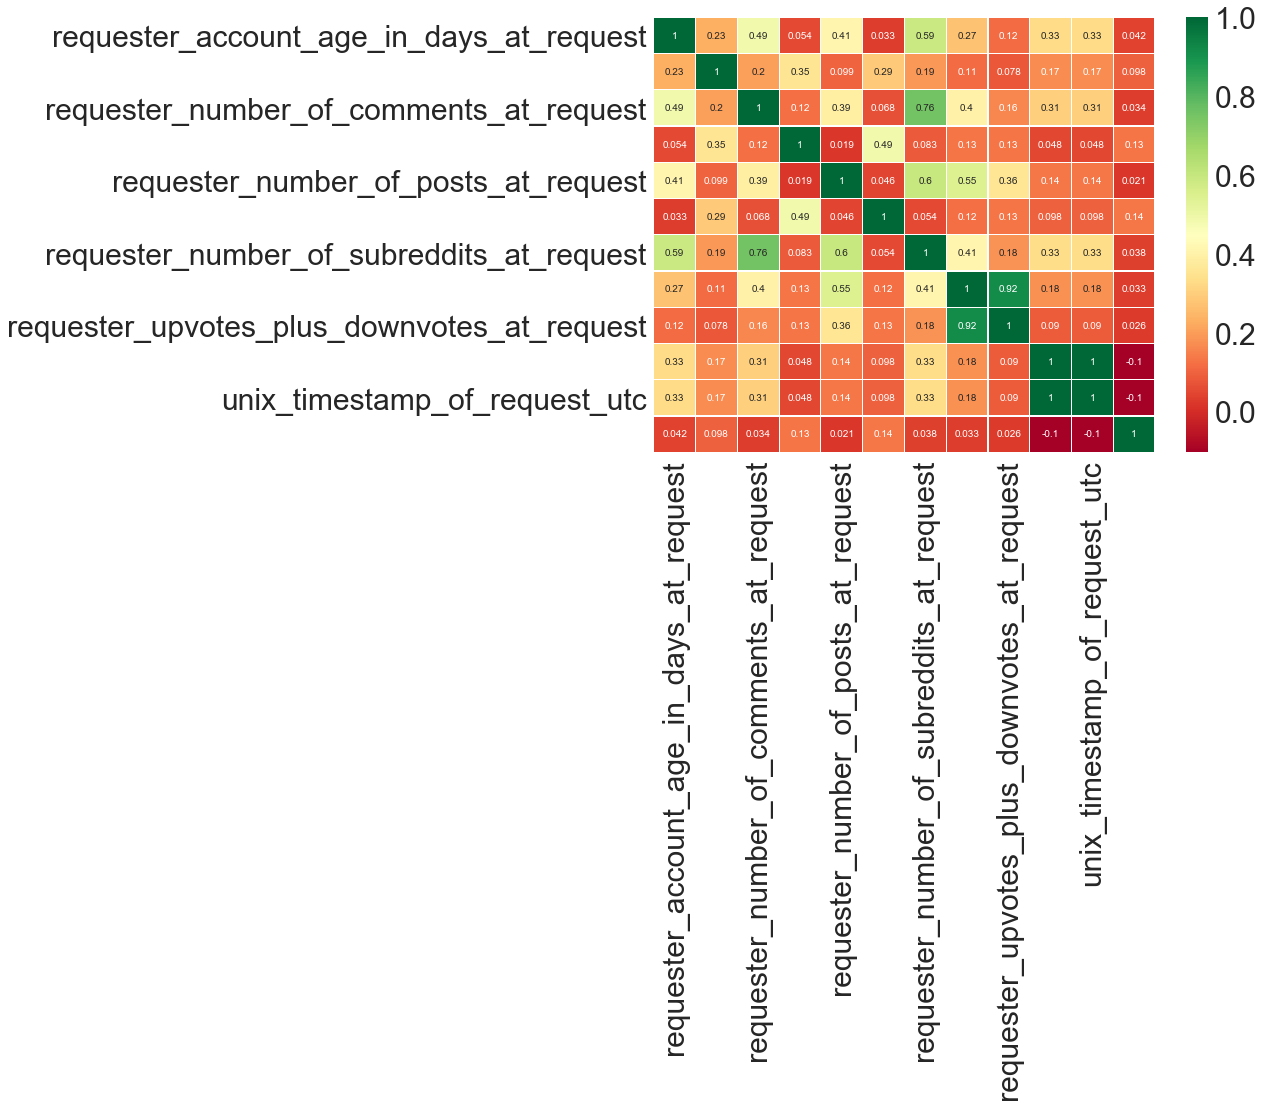

In [304]:
# do correlation map
sns.heatmap(train_target.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) #data.corr()-->correlation matrix
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.show()

In [305]:
print("Find most important features relative to target")
corr = train_target.corr()
corr.sort_values(['requester_received_pizza'], ascending=False, inplace=True)
print corr.requester_received_pizza.head(10)
print corr.requester_received_pizza[corr.requester_received_pizza>-1].tail(10)

Find most important features relative to target
requester_received_pizza                              1.000000
requester_number_of_posts_on_raop_at_request          0.137208
requester_number_of_comments_in_raop_at_request       0.131296
requester_days_since_first_post_on_raop_at_request    0.098225
requester_account_age_in_days_at_request              0.041784
requester_number_of_subreddits_at_request             0.037647
requester_number_of_comments_at_request               0.033779
requester_upvotes_minus_downvotes_at_request          0.032571
requester_upvotes_plus_downvotes_at_request           0.026102
requester_number_of_posts_at_request                  0.020612
Name: requester_received_pizza, dtype: float64
requester_number_of_comments_in_raop_at_request       0.131296
requester_days_since_first_post_on_raop_at_request    0.098225
requester_account_age_in_days_at_request              0.041784
requester_number_of_subreddits_at_request             0.037647
requester_number_of_com

### Observations
Without log tranformation of features, the higher the number of posts, comments, and early posters are correlated with a greater likelihood of receiving pizza. Veteran reddit users (reddit users with an older account age) and highly engaged reddit users (redditors with many subscribed subreddits) are also more likely to get pizza.

# NLP of Request Title and Text

In [306]:
merged=pd.concat([train_df,test_df])
merged=merged.reset_index(drop=True)

In [307]:
text_title=merged[['request_text_edit_aware','request_title']].reset_index(drop=True)
print text_title['request_title'][0]
print '\n'
print text_title['request_text_edit_aware'][0]

Request Colorado Springs Help Us Please


Hi I am in need of food for my 4 children we are a military family that has really hit hard times and we have exahusted all means of help just to be able to feed my family and make it through another night is all i ask i know our blessing is coming so whatever u can find in your heart to give is greatly appreciated


In [308]:
#dictionary of apostrophe words
APPO = {
"aren't" : "are not",
"can't" : "cannot",
"couldn't" : "could not",
"didn't" : "did not",
"doesn't" : "does not",
"don't" : "do not",
"hadn't" : "had not",
"hasn't" : "has not",
"haven't" : "have not",
"he'd" : "he would",
"he'll" : "he will",
"he's" : "he is",
"i'd" : "I would",
"i'd" : "I had",
"i'll" : "I will",
"i'm" : "I am",
"isn't" : "is not",
"it's" : "it is",
"it'll":"it will",
"i've" : "I have",
"let's" : "let us",
"mightn't" : "might not",
"mustn't" : "must not",
"shan't" : "shall not",
"she'd" : "she would",
"she'll" : "she will",
"she's" : "she is",
"shouldn't" : "should not",
"that's" : "that is",
"there's" : "there is",
"they'd" : "they would",
"they'll" : "they will",
"they're" : "they are",
"they've" : "they have",
"we'd" : "we would",
"we're" : "we are",
"weren't" : "were not",
"we've" : "we have",
"what'll" : "what will",
"what're" : "what are",
"what's" : "what is",
"what've" : "what have",
"where's" : "where is",
"who'd" : "who would",
"who'll" : "who will",
"who're" : "who are",
"who's" : "who is",
"who've" : "who have",
"won't" : "will not",
"wouldn't" : "would not",
"you'd" : "you would",
"you'll" : "you will",
"you're" : "you are",
"you've" : "you have",
"'re": " are",
"wasn't": "was not",
"we'll":" will",
"didn't": "did not",
"tryin'":"trying"}

In [309]:
def initial_clean(raw_text):
    # split words and lowercase
    words = raw_text.lower().split() 
    # convert contractions into individual words
    words=[APPO[word] if word in APPO else word for word in words]
    # join words
    words=" ".join(words)
    # return only words
    letters_only = re.sub("[^a-zA-Z]", " ", words)
    words=tokenizer.tokenize(letters_only)
    words=[lem.lemmatize(word, "v") for word in words]
    words = [w for w in words if not w in eng_stopwords]
    clean_sent=" ".join(words)

    
    return clean_sent

#create cleaned lyrics column
text_title['cleaned_title']=text_title['request_title'].apply(initial_clean)
text_title['cleaned_request']=text_title['request_text_edit_aware'].apply(initial_clean)
text_title.head()

,request_text_edit_aware,request_title,cleaned_title,cleaned_request
0,Hi I am in need of food for my 4 children we a...,Request Colorado Springs Help Us Please,request colorado spring help us please,hi need food children military family really h...
1,I spent the last money I had on gas today. Im ...,"[Request] California, No cash and I could use ...",request california cash could use dinner,spend last money gas today im break next thursday
2,My girlfriend decided it would be a good idea ...,"[Request] Hungry couple in Dundee, Scotland wo...",request hungry couple dundee scotland would lo...,girlfriend decide would good idea get perth bu...
3,"It's cold, I'n hungry, and to be completely ho...","[Request] In Canada (Ontario), just got home f...",request canada ontario get home school need pizza,cold n hungry completely honest I break mum sa...
4,hey guys:\n I love this sub. I think it's grea...,[Request] Old friend coming to visit. Would LO...,request old friend come visit would love fee d...,hey guy love sub think great except sob storie...


In [310]:
# descriptive stats for title
text_title['title_count_word']=text_title["cleaned_title"].apply(lambda x: len(str(x).split()))
text_title['title_count_unique_word']=text_title["cleaned_title"].apply(lambda x: len(set(str(x).split())))#split creates groups
#Letter count
text_title['title_count_letters']=text_title["cleaned_title"].apply(lambda x: len(str(x)))
#Average length of the words
text_title["title_mean_word_len"] = text_title["cleaned_title"].apply(lambda x: np.mean([len(w) for w in str(x).split()]))
#Word count percent in each comment:
text_title['title_word_unique_percent']=text_title['title_count_unique_word']*100.0/text_title['title_count_word']
text_title.head()

,request_text_edit_aware,request_title,cleaned_title,cleaned_request,title_count_word,title_count_unique_word,title_count_letters,title_mean_word_len,title_word_unique_percent
0,Hi I am in need of food for my 4 children we a...,Request Colorado Springs Help Us Please,request colorado spring help us please,hi need food children military family really h...,6,6,38,5.500000,100.0
1,I spent the last money I had on gas today. Im ...,"[Request] California, No cash and I could use ...",request california cash could use dinner,spend last money gas today im break next thursday,6,6,40,5.833333,100.0
2,My girlfriend decided it would be a good idea ...,"[Request] Hungry couple in Dundee, Scotland wo...",request hungry couple dundee scotland would lo...,girlfriend decide would good idea get perth bu...,8,8,54,5.875000,100.0
3,"It's cold, I'n hungry, and to be completely ho...","[Request] In Canada (Ontario), just got home f...",request canada ontario get home school need pizza,cold n hungry completely honest I break mum sa...,8,8,49,5.250000,100.0
4,hey guys:\n I love this sub. I think it's grea...,[Request] Old friend coming to visit. Would LO...,request old friend come visit would love fee d...,hey guy love sub think great except sob storie...,10,10,59,5.000000,100.0


In [311]:
# descriptive stats for request
text_title['request_count_word']=text_title["cleaned_request"].apply(lambda x: len(str(x).split()))
text_title['request_count_unique_word']=text_title["cleaned_request"].apply(lambda x: len(set(str(x).split())))#split creates groups
#Letter count
text_title['request_count_letters']=text_title["cleaned_request"].apply(lambda x: len(str(x)))
#Average length of the words
text_title["request_mean_word_len"] = text_title["cleaned_request"].apply(lambda x: np.mean([len(w) for w in str(x).split()]))
#Word count percent in each comment:
text_title['request_word_unique_percent']=text_title['request_count_unique_word']*100.0/text_title['request_count_word']
text_title.head()

,request_text_edit_aware,request_title,cleaned_title,cleaned_request,title_count_word,title_count_unique_word,title_count_letters,title_mean_word_len,title_word_unique_percent,request_count_word,request_count_unique_word,request_count_letters,request_mean_word_len,request_word_unique_percent
0,Hi I am in need of food for my 4 children we a...,Request Colorado Springs Help Us Please,request colorado spring help us please,hi need food children military family really h...,6,6,38,5.500000,100.0,30,29,179,5.000000,96.666667
1,I spent the last money I had on gas today. Im ...,"[Request] California, No cash and I could use ...",request california cash could use dinner,spend last money gas today im break next thursday,6,6,40,5.833333,100.0,9,9,49,4.555556,100.000000
2,My girlfriend decided it would be a good idea ...,"[Request] Hungry couple in Dundee, Scotland wo...",request hungry couple dundee scotland would lo...,girlfriend decide would good idea get perth bu...,8,8,54,5.875000,100.0,27,23,155,4.777778,85.185185
3,"It's cold, I'n hungry, and to be completely ho...","[Request] In Canada (Ontario), just got home f...",request canada ontario get home school need pizza,cold n hungry completely honest I break mum sa...,8,8,49,5.250000,100.0,18,17,110,5.166667,94.444444
4,hey guys:\n I love this sub. I think it's grea...,[Request] Old friend coming to visit. Would LO...,request old friend come visit would love fee d...,hey guy love sub think great except sob storie...,10,10,59,5.000000,100.0,51,44,266,4.235294,86.274510


xtrain, xvalid, ytrain, yvalid = train_test_split(train.text.values, y, 
                                                  stratify=y, 
                                                  random_state=42, 
                                                  test_size=0.1, shuffle=True)

In [312]:
# request
tfv = TfidfVectorizer(min_df=3,  max_features=None, 
            strip_accents='unicode', analyzer='word',token_pattern=r'\w{1,}',
            ngram_range=(1, 3), use_idf=1,smooth_idf=1,sublinear_tf=1,
            stop_words = 'english')

# Fitting TF-IDF to both training and test sets (semi-supervised learning)
merged_tfv=tfv.fit_transform(text_title['cleaned_request']) 
features=[x+'_BODY' for x in np.array(tfv.get_feature_names())]
print len(features)
merged_request = pd.DataFrame(merged_tfv.toarray(),columns=features)
merged_request.head()

13717


,aa_BODY,abandon_BODY,abc_BODY,abilities_BODY,ability_BODY,able_BODY,able afford_BODY,able afford food_BODY,able buy_BODY,able buy food_BODY,...,za_BODY,zealand_BODY,zero_BODY,zero dollars_BODY,zero food_BODY,zero fund_BODY,zip_BODY,zombies_BODY,zone_BODY,zza_BODY
0,0.0,0.0,0.0,0.0,0.0,0.106736,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.081647,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [313]:
# title
tfv = TfidfVectorizer(min_df=3,  max_features=None, 
            strip_accents='unicode', analyzer='word',token_pattern=r'\w{1,}',
            ngram_range=(1, 3), use_idf=1,smooth_idf=1,sublinear_tf=1,
            stop_words = 'english')

# Fitting TF-IDF to both training and test sets (semi-supervised learning)
merged_tfv=tfv.fit_transform(text_title['cleaned_title']) 
features=[x+'_TITLE' for x in np.array(tfv.get_feature_names())]
# print features
print len(features)
merged_title = pd.DataFrame(merged_tfv.toarray(),columns=features)
merged_title.head()

3761


,ab_TITLE,ab canada_TITLE,able_TITLE,able eat_TITLE,able help_TITLE,able work_TITLE,abroad_TITLE,absolutely_TITLE,ac_TITLE,accident_TITLE,...,york_TITLE,york usa_TITLE,young_TITLE,yr_TITLE,yr old_TITLE,yummy_TITLE,yummy pizza_TITLE,za_TITLE,zealand_TITLE,zza_TITLE
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [314]:
numerical_word_feat=text_title.select_dtypes(include=numerics)
print numerical_word_feat.shape
numerical_word_feat.head()

(5671, 10)


,title_count_word,title_count_unique_word,title_count_letters,title_mean_word_len,title_word_unique_percent,request_count_word,request_count_unique_word,request_count_letters,request_mean_word_len,request_word_unique_percent
0,6,6,38,5.500000,100.0,30,29,179,5.000000,96.666667
1,6,6,40,5.833333,100.0,9,9,49,4.555556,100.000000
2,8,8,54,5.875000,100.0,27,23,155,4.777778,85.185185
3,8,8,49,5.250000,100.0,18,17,110,5.166667,94.444444
4,10,10,59,5.000000,100.0,51,44,266,4.235294,86.274510


In [315]:
tf_complete=pd.concat([merged_request,merged_title,numerical_word_feat],axis=1)
tf_complete.head()

,aa_BODY,abandon_BODY,abc_BODY,abilities_BODY,ability_BODY,able_BODY,able afford_BODY,able afford food_BODY,able buy_BODY,able buy food_BODY,...,title_count_word,title_count_unique_word,title_count_letters,title_mean_word_len,title_word_unique_percent,request_count_word,request_count_unique_word,request_count_letters,request_mean_word_len,request_word_unique_percent
0,0.0,0.0,0.0,0.0,0.0,0.106736,0.0,0.0,0.0,0.0,...,6,6,38,5.500000,100.0,30,29,179,5.000000,96.666667
1,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,6,6,40,5.833333,100.0,9,9,49,4.555556,100.000000
2,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,8,8,54,5.875000,100.0,27,23,155,4.777778,85.185185
3,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,8,8,49,5.250000,100.0,18,17,110,5.166667,94.444444
4,0.0,0.0,0.0,0.0,0.0,0.081647,0.0,0.0,0.0,0.0,...,10,10,59,5.000000,100.0,51,44,266,4.235294,86.274510


In [316]:
tf_comp_train=pd.concat([target,tf_complete[:len(target)]],axis=1)
tf_comp_train.head(1)

,requester_received_pizza,aa_BODY,abandon_BODY,abc_BODY,abilities_BODY,ability_BODY,able_BODY,able afford_BODY,able afford food_BODY,able buy_BODY,...,title_count_word,title_count_unique_word,title_count_letters,title_mean_word_len,title_word_unique_percent,request_count_word,request_count_unique_word,request_count_letters,request_mean_word_len,request_word_unique_percent
0,0,0.0,0.0,0.0,0.0,0.0,0.106736,0.0,0.0,0.0,...,6,6,38,5.5,100.0,30,29,179,5.0,96.666667


In [317]:
corr = tf_comp_train.corrwith(tf_comp_train['requester_received_pizza'])
corr.sort_values(ascending=False).head(20)

requester_received_pizza     1.000000
request_count_unique_word    0.123851
request_count_word           0.116904
request_count_letters        0.116012
rice_BODY                    0.081943
http imgur_BODY              0.079312
http imgur com_BODY          0.079312
imgur com_BODY               0.078049
imgur_BODY                   0.075876
jpg_BODY                     0.074177
pay_BODY                     0.073635
days_BODY                    0.071712
check_BODY                   0.065047
http_BODY                    0.064443
leftover_BODY                0.064012
tight_BODY                   0.062072
need little help_TITLE       0.061194
paycheck_BODY                0.059963
fee days_BODY                0.059815
spare money_BODY             0.059511
dtype: float64

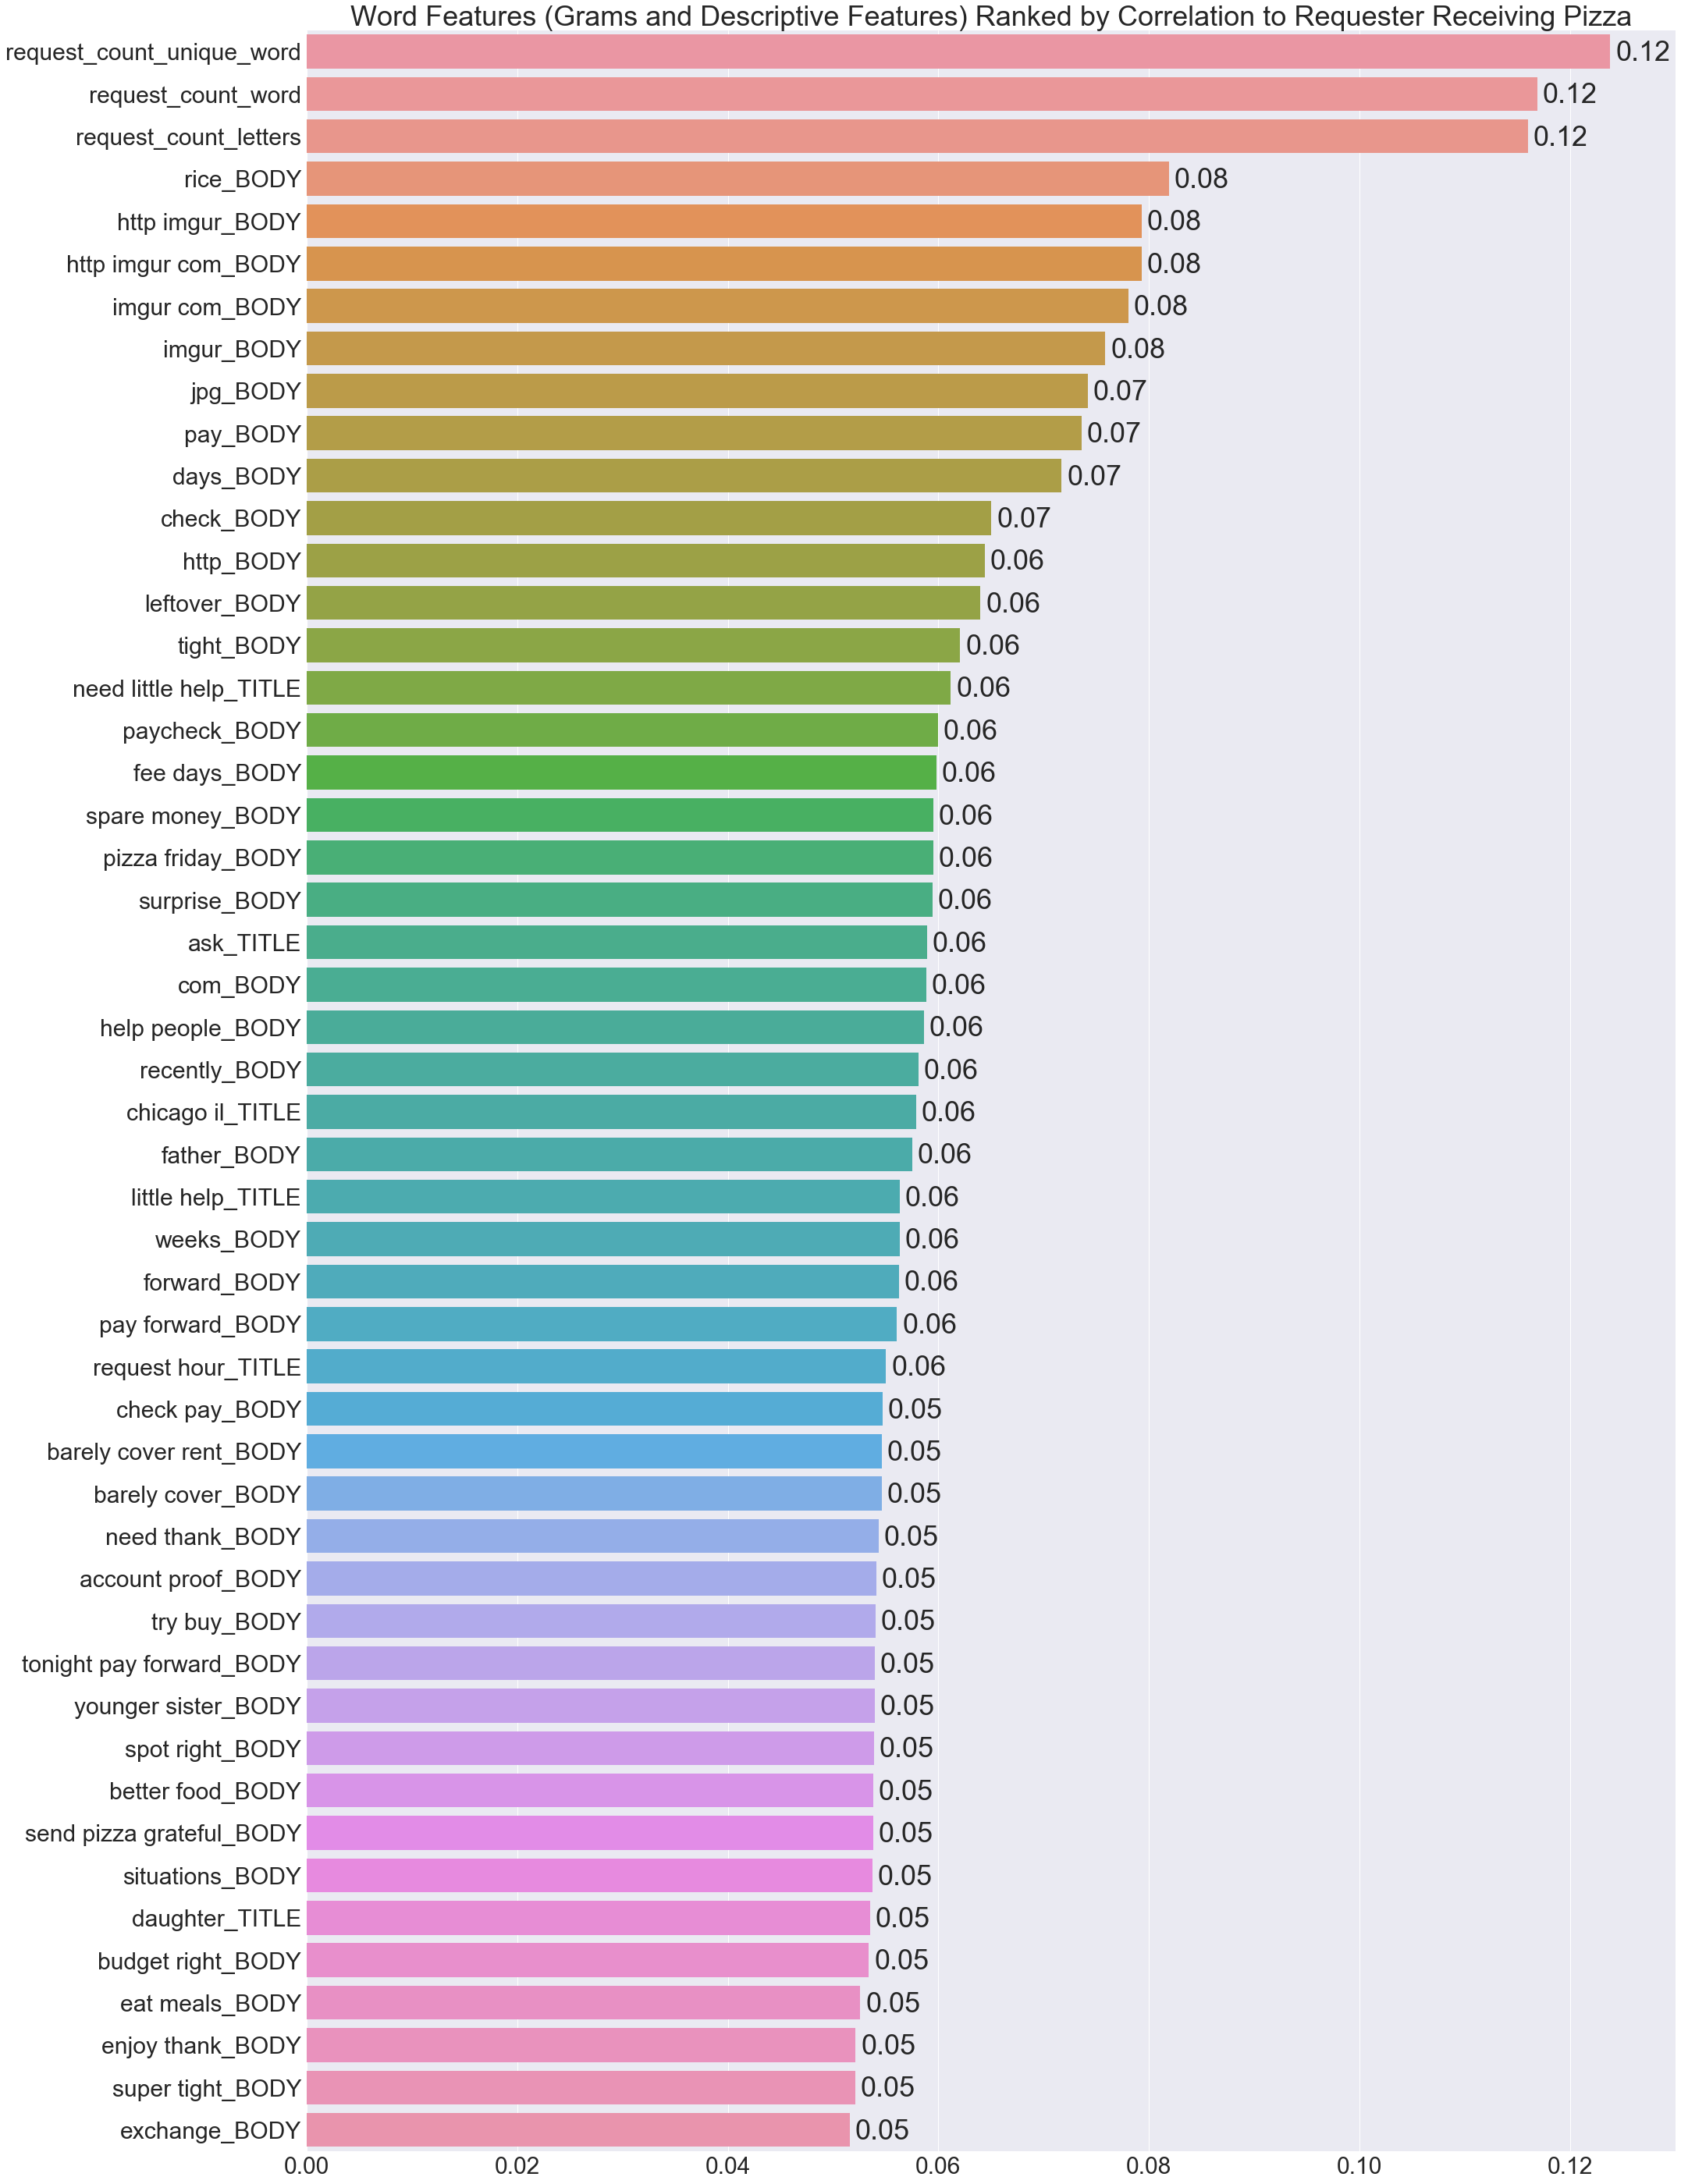

In [318]:
sns.set(font_scale=3)
plt.figure(figsize=(28,50))
plt.title("Word Features (Grams and Descriptive Features) Ranked by Correlation to Requester Receiving Pizza")
ax=sns.barplot(y=corr.sort_values(ascending=False)[1:].head(50).index,\
            x=corr.sort_values(ascending=False)[1:].head(50),orient='h')

for p in ax.patches:
    width = p.get_width()
    plt.text(0.0005+p.get_width(), p.get_y()+0.55*p.get_height(),
             '{:1.2f}'.format(width),
             ha='left', va='center') 

plt.show()

# Glove Vectors

In [319]:
text_title.head()

,request_text_edit_aware,request_title,cleaned_title,cleaned_request,title_count_word,title_count_unique_word,title_count_letters,title_mean_word_len,title_word_unique_percent,request_count_word,request_count_unique_word,request_count_letters,request_mean_word_len,request_word_unique_percent
0,Hi I am in need of food for my 4 children we a...,Request Colorado Springs Help Us Please,request colorado spring help us please,hi need food children military family really h...,6,6,38,5.500000,100.0,30,29,179,5.000000,96.666667
1,I spent the last money I had on gas today. Im ...,"[Request] California, No cash and I could use ...",request california cash could use dinner,spend last money gas today im break next thursday,6,6,40,5.833333,100.0,9,9,49,4.555556,100.000000
2,My girlfriend decided it would be a good idea ...,"[Request] Hungry couple in Dundee, Scotland wo...",request hungry couple dundee scotland would lo...,girlfriend decide would good idea get perth bu...,8,8,54,5.875000,100.0,27,23,155,4.777778,85.185185
3,"It's cold, I'n hungry, and to be completely ho...","[Request] In Canada (Ontario), just got home f...",request canada ontario get home school need pizza,cold n hungry completely honest I break mum sa...,8,8,49,5.250000,100.0,18,17,110,5.166667,94.444444
4,hey guys:\n I love this sub. I think it's grea...,[Request] Old friend coming to visit. Would LO...,request old friend come visit would love fee d...,hey guy love sub think great except sob storie...,10,10,59,5.000000,100.0,51,44,266,4.235294,86.274510


In [320]:
# load the GloVe vectors in a dictionary:

embeddings_index = {}
f = open('../spooky_nlp_tut/glove.840B.300d.txt')

for line in tqdm(f):
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

print('Found %s word vectors.' % len(embeddings_index))

2196017it [02:46, 13169.59it/s]

Found 2196016 word vectors.


In [321]:
# this function creates a normalized vector for the whole sentence
def sent2vec(s):
    words = str(s).lower().decode('utf-8')
    words = word_tokenize(words)
    words = [w for w in words if not w in stop_words]
    words = [w for w in words if w.isalpha()]
    M = []
    for w in words:
        try:
            M.append(embeddings_index[w])
        except:
            continue
    M = np.array(M)
    v = M.sum(axis=0)
    if type(v) != np.ndarray:
        return np.zeros(300)
    return v / np.sqrt((v ** 2).sum())

In [322]:
# glove for request and title
stop_words = stopwords.words('english')
glove_request = [sent2vec(x) for x in tqdm(text_title['cleaned_request'])]
glove_title = [sent2vec(x) for x in tqdm(text_title['cleaned_title'])]
glove_request=np.array(glove_request)
glove_title=np.array(glove_title)

100%|██████████| 5671/5671 [00:02<00:00, 2831.92it/s]


In [323]:
glove_request=pd.DataFrame(glove_request)
glove_request.columns=[str(x)+'_BODY' for x in list(glove_request)]
glove_title=pd.DataFrame(glove_title)
glove_title.columns=[str(x)+'_TITLE' for x in list(glove_title)]
glove_complete=pd.concat([glove_request,glove_title],axis=1)
glove_complete.head(1)

,0_BODY,1_BODY,2_BODY,3_BODY,4_BODY,5_BODY,6_BODY,7_BODY,8_BODY,9_BODY,...,290_TITLE,291_TITLE,292_TITLE,293_TITLE,294_TITLE,295_TITLE,296_TITLE,297_TITLE,298_TITLE,299_TITLE
0,-0.034718,0.056793,-0.048261,-0.009237,0.018184,-0.016777,0.005971,-0.057013,0.002589,0.66209,...,-0.048319,-0.003436,-0.011124,-0.018057,0.052002,-0.110957,0.017873,-0.027037,-0.037032,0.033874


# Making Sense of Subreddits
- look at most popular subreddits and create features for popular subreddit membership
- will create group inclusion for subreddits with more than 50 members

In [324]:
print merged.dtypes
merged.head(1)

giver_username_if_known                                object
request_id                                             object
request_text_edit_aware                                object
request_title                                          object
requester_account_age_in_days_at_request              float64
requester_days_since_first_post_on_raop_at_request    float64
requester_number_of_comments_at_request                 int64
requester_number_of_comments_in_raop_at_request         int64
requester_number_of_posts_at_request                    int64
requester_number_of_posts_on_raop_at_request            int64
requester_number_of_subreddits_at_request               int64
requester_subreddits_at_request                        object
requester_upvotes_minus_downvotes_at_request            int64
requester_upvotes_plus_downvotes_at_request             int64
requester_username                                     object
unix_timestamp_of_request                               int64
unix_tim

,giver_username_if_known,request_id,request_text_edit_aware,request_title,requester_account_age_in_days_at_request,requester_days_since_first_post_on_raop_at_request,requester_number_of_comments_at_request,requester_number_of_comments_in_raop_at_request,requester_number_of_posts_at_request,requester_number_of_posts_on_raop_at_request,requester_number_of_subreddits_at_request,requester_subreddits_at_request,requester_upvotes_minus_downvotes_at_request,requester_upvotes_plus_downvotes_at_request,requester_username,unix_timestamp_of_request,unix_timestamp_of_request_utc
0,N/A,t3_l25d7,Hi I am in need of food for my 4 children we a...,Request Colorado Springs Help Us Please,0.0,0.0,0,0,0,0,0,[],0,0,nickylvst,1317852607,1317849007


In [325]:
merged['requester_subreddits_at_request'].reset_index(drop=True)[1]

[u'AskReddit',
 u'Eve',
 u'IAmA',
 u'MontereyBay',
 u'RandomKindness',
 u'RedditBiography',
 u'dubstep',
 u'gamecollecting',
 u'gaming',
 u'halo',
 u'i18n',
 u'techsupport']

In [326]:
flat_list = [item for sublist in merged['requester_subreddits_at_request'].tolist() for item in sublist]
subreddit_count=pd.Series(dict(Counter(flat_list))).sort_values(ascending=False)
print 'number of subreddits with more than 50 members'
print len(subreddit_count[subreddit_count > 50])
subreddit_count[subreddit_count > 50].head(20)

number of subreddits with more than 50 members
291


AskReddit               3241
pics                    2734
funny                   2704
IAmA                    2138
WTF                     2133
gaming                  2079
Random_Acts_Of_Pizza    1978
videos                  1620
todayilearned           1556
AdviceAnimals           1452
aww                     1302
reddit.com              1283
fffffffuuuuuuuuuuuu     1245
trees                   1238
Music                   1175
politics                1148
atheism                 1135
movies                   836
worldnews                759
technology               661
dtype: int64

In [327]:
top_50_sub=subreddit_count[subreddit_count > 50]
top_50_sub.index

Index([u'AskReddit', u'pics', u'funny', u'IAmA', u'WTF', u'gaming',
       u'Random_Acts_Of_Pizza', u'videos', u'todayilearned', u'AdviceAnimals',
       ...
       u'wallpaper', u'popping', u'FiftyFifty', u'Borderlands',
       u'StonerEngineering', u'KarmaConspiracy', u'masseffect',
       u'reportthespammers', u'Anxiety', u'malehairadvice'],
      dtype='object', length=291)

In [328]:
subreddit_df=merged['requester_subreddits_at_request']
subreddit_counts=[]
for sub in top_50_sub.index:
    subreddit_counts.append(subreddit_df.apply(lambda x: 1 if sub in x else 0))

In [329]:
top_50_sub_df=pd.DataFrame(subreddit_counts)
top_50_sub_df.index=top_50_sub.index
top_50_sub_df=top_50_sub_df.T
top_50_sub_df.head()

,AskReddit,pics,funny,IAmA,WTF,gaming,Random_Acts_Of_Pizza,videos,todayilearned,AdviceAnimals,...,wallpaper,popping,FiftyFifty,Borderlands,StonerEngineering,KarmaConspiracy,masseffect,reportthespammers,Anxiety,malehairadvice
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# clustering analysis of all features
- merge glove_complete, top_50_sub_df, num_merged into single df and perform PCA and then clustering
- scale skewed numeric features not rel
ated to glove
- merge all glove features with numeric types
- scale all features
- feed into keras model

In [330]:
merged.head()

,giver_username_if_known,request_id,request_text_edit_aware,request_title,requester_account_age_in_days_at_request,requester_days_since_first_post_on_raop_at_request,requester_number_of_comments_at_request,requester_number_of_comments_in_raop_at_request,requester_number_of_posts_at_request,requester_number_of_posts_on_raop_at_request,requester_number_of_subreddits_at_request,requester_subreddits_at_request,requester_upvotes_minus_downvotes_at_request,requester_upvotes_plus_downvotes_at_request,requester_username,unix_timestamp_of_request,unix_timestamp_of_request_utc
0,N/A,t3_l25d7,Hi I am in need of food for my 4 children we a...,Request Colorado Springs Help Us Please,0.000000,0.000000,0,0,0,0,0,[],0,0,nickylvst,1317852607,1317849007
1,N/A,t3_rcb83,I spent the last money I had on gas today. Im ...,"[Request] California, No cash and I could use ...",501.111100,0.000000,0,0,15,0,12,"[AskReddit, Eve, IAmA, MontereyBay, RandomKind...",34,116,fohacidal,1332652424,1332648824
2,N/A,t3_lpu5j,My girlfriend decided it would be a good idea ...,"[Request] Hungry couple in Dundee, Scotland wo...",0.000000,0.000000,0,0,0,0,0,[],0,0,jacquibatman7,1319650094,1319646494
3,N/A,t3_mxvj3,"It's cold, I'n hungry, and to be completely ho...","[Request] In Canada (Ontario), just got home f...",6.518438,0.000000,36,0,1,0,4,"[AskReddit, DJs, IAmA, Random_Acts_Of_Pizza]",54,76,4on_the_floor,1322855434,1322855434
4,N/A,t3_1i6486,hey guys:\n I love this sub. I think it's grea...,[Request] Old friend coming to visit. Would LO...,162.063252,101.606505,140,2,14,0,11,"[GayBrosWeightLoss, RandomActsOfCookies, Rando...",1121,1733,Futuredogwalker,1373657691,1373654091


In [331]:
# numerical merged dataframe
num_merged=merged.select_dtypes(include=numerics)
print merged.shape
num_merged.head(1)

(5671, 17)


,requester_account_age_in_days_at_request,requester_days_since_first_post_on_raop_at_request,requester_number_of_comments_at_request,requester_number_of_comments_in_raop_at_request,requester_number_of_posts_at_request,requester_number_of_posts_on_raop_at_request,requester_number_of_subreddits_at_request,requester_upvotes_minus_downvotes_at_request,requester_upvotes_plus_downvotes_at_request,unix_timestamp_of_request,unix_timestamp_of_request_utc
0,0.0,0.0,0,0,0,0,0,0,0,1317852607,1317849007


In [332]:
# transform num_merged features for outliers

In [333]:
# merge all dataframes
glove_all_feats=pd.concat([num_merged,top_50_sub_df,glove_complete.reset_index(drop=True)],axis=1)
print glove_all_feats.shape
glove_all_feats.head(1)

(5671, 902)


,requester_account_age_in_days_at_request,requester_days_since_first_post_on_raop_at_request,requester_number_of_comments_at_request,requester_number_of_comments_in_raop_at_request,requester_number_of_posts_at_request,requester_number_of_posts_on_raop_at_request,requester_number_of_subreddits_at_request,requester_upvotes_minus_downvotes_at_request,requester_upvotes_plus_downvotes_at_request,unix_timestamp_of_request,...,290_TITLE,291_TITLE,292_TITLE,293_TITLE,294_TITLE,295_TITLE,296_TITLE,297_TITLE,298_TITLE,299_TITLE
0,0.0,0.0,0,0,0,0,0,0,0,1317852607,...,-0.048319,-0.003436,-0.011124,-0.018057,0.052002,-0.110957,0.017873,-0.027037,-0.037032,0.033874


In [334]:
# scale all features

for f in list(glove_all_feats):
    glove_all_feats[f]=MinMaxScaler().fit_transform(glove_all_feats[f].as_matrix().reshape(-1,1)).flatten()

/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:4: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  after removing the cwd from sys.path.
/anaconda2/lib/python2.7/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)
/anaconda2/lib/python2.7/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)
/anaconda2/lib/python2.7/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)
/anaconda2/lib/python2.7/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.wa

/anaconda2/lib/python2.7/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)
/anaconda2/lib/python2.7/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)
/anaconda2/lib/python2.7/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)
/anaconda2/lib/python2.7/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)
/anaconda2/lib/python2.7/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.

/anaconda2/lib/python2.7/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)
/anaconda2/lib/python2.7/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)
/anaconda2/lib/python2.7/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)
/anaconda2/lib/python2.7/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)
/anaconda2/lib/python2.7/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.

/anaconda2/lib/python2.7/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)
/anaconda2/lib/python2.7/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)
/anaconda2/lib/python2.7/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)
/anaconda2/lib/python2.7/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)
/anaconda2/lib/python2.7/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.

/anaconda2/lib/python2.7/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)
/anaconda2/lib/python2.7/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)
/anaconda2/lib/python2.7/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)
/anaconda2/lib/python2.7/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)
/anaconda2/lib/python2.7/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.

## scale features, PCA, clustering

# clustering of just text features, with users with no request body excluded

In [341]:
# examine missing data
print tf_complete.isnull().sum().sort_values(ascending=False)[:5]
missing_body_ids=tf_complete[tf_complete.request_mean_word_len.isnull()].index
merged.iloc[tf_complete[tf_complete.request_mean_word_len.isnull()].index,:][:5]
# fill nulls
#tf_complete=tf_complete.fillna(0)

request_word_unique_percent    166
request_mean_word_len          166
injure_BODY                      0
kind send pizza_BODY             0
kind proof_BODY                  0
dtype: int64


,giver_username_if_known,request_id,request_text_edit_aware,request_title,requester_account_age_in_days_at_request,requester_days_since_first_post_on_raop_at_request,requester_number_of_comments_at_request,requester_number_of_comments_in_raop_at_request,requester_number_of_posts_at_request,requester_number_of_posts_on_raop_at_request,requester_number_of_subreddits_at_request,requester_subreddits_at_request,requester_upvotes_minus_downvotes_at_request,requester_upvotes_plus_downvotes_at_request,requester_username,unix_timestamp_of_request,unix_timestamp_of_request_utc
41,N/A,t3_rtzx6,,"(Request) Bowling Green, Ohio. My bank accoun...",249.293229,66.993947,580,1,69,0,63,"[4chan, AdviceAnimals, AmISexy, Art, AskReddit...",3843,6429,bingbangbooom,1333595832,1333592232
125,N/A,t3_1d743u,,[Request] I am hungry and would like to have s...,249.185787,0.000000,1,0,0,0,1,[UniversityofReddit],1,1,sir_scotch,1367036124,1367032524
174,N/A,t3_18h7g0,,[REQUEST] Kentucky USA i am so hungry. please ...,508.154676,0.000000,4,0,0,0,5,"[LoLGaymers, Random_Acts_Of_Pizza, WTF, gaymer...",4,22,tyalah,1360798869,1360798869
250,N/A,t3_1n1ors,,"[REQUEST] Belmont, MA. Broke and sick. Pizza w...",239.692940,82.643576,288,0,64,1,58,"[AMA, Anxiety, AskMen, AskReddit, Assistance, ...",1415,2631,tOki_Sori,1380077476,1380048676
308,N/A,t3_1czbz2,,"[request] London, Ontario. I just quit smoking...",162.118854,0.000000,7,0,4,0,8,"[AdviceAnimals, AskReddit, Music, NewOrleans, ...",22,72,Juiceyp,1366772483,1366768883


In [348]:
# filter only ids that have a body
glove_complete=glove_complete[~glove_complete.index.isin(missing_body_ids)]

In [349]:
class PFA(object):
    def __init__(self, n_features, q=None):
        self.q = q
        self.n_features = n_features

    def fit(self, X):
        if not self.q:
            self.q = X.shape[1]

        sc = StandardScaler()
        X = sc.fit_transform(X)

        pca = PCA(n_components=self.q,random_state=1).fit(X)
        A_q = pca.components_.T

        kmeans = KMeans(n_clusters=self.n_features,random_state=0).fit(A_q)
        clusters = kmeans.predict(A_q)
        cluster_centers = kmeans.cluster_centers_

        dists = defaultdict(list)
        for i, c in enumerate(clusters):
            dist = euclidean_distances([A_q[i, :]], [cluster_centers[c, :]])[0][0]
            dists[c].append((i, dist))

        self.indices_ = [sorted(f, key=lambda x: x[1])[0][0] for f in dists.values()]
        self.features_ = X[:, self.indices_]

In [350]:
# the above function applied# the ab 
pfa = PFA(n_features=300)
pfa.fit(glove_complete.values)

# To get the transformed matrix
X2 = pfa.features_

# To get the column indices of the kept features
column_indices = pfa.indices_
print column_indices
print X2.shape
#print X2

[321, 428, 578, 52, 404, 247, 329, 47, 341, 151, 468, 45, 178, 159, 471, 114, 357, 181, 394, 96, 28, 549, 431, 510, 435, 102, 556, 142, 281, 270, 15, 130, 355, 295, 312, 206, 338, 68, 374, 352, 387, 511, 298, 48, 202, 548, 564, 29, 248, 51, 541, 22, 240, 279, 460, 362, 493, 568, 243, 138, 129, 519, 558, 258, 475, 479, 415, 451, 303, 461, 219, 359, 280, 455, 445, 527, 381, 167, 1, 488, 414, 77, 498, 118, 265, 544, 216, 38, 25, 395, 586, 143, 507, 203, 145, 255, 207, 42, 82, 60, 31, 246, 39, 116, 18, 224, 172, 360, 188, 0, 234, 154, 83, 94, 70, 26, 354, 33, 3, 71, 32, 487, 242, 232, 87, 119, 13, 373, 292, 226, 214, 61, 56, 563, 213, 58, 441, 440, 140, 448, 434, 489, 339, 59, 308, 573, 316, 569, 257, 334, 16, 278, 437, 53, 180, 332, 429, 230, 168, 595, 547, 518, 500, 392, 141, 439, 204, 283, 317, 86, 244, 550, 262, 351, 492, 365, 296, 250, 175, 110, 271, 324, 538, 459, 62, 209, 408, 485, 436, 583, 450, 356, 148, 476, 494, 418, 481, 89, 424, 345, 348, 310, 542, 419, 197, 551, 192, 423, 509

In [351]:
def clustering_silhoutte(command,num_features=5):
    if num_features:
        pfa = PFA(n_features=num_features)
        pfa.fit(glove_complete.values)
        column_indices = pfa.indices_
    
    if command=='partial':   
        tocluster = glove_complete.iloc[:,column_indices]
    else:
        tocluster = glove_complete
    
    clusters_list=[]
    sil_list=[]
    
    for s in [2,3,4,5]:
        clusterer = KMeans(n_clusters=s,random_state=42).fit(tocluster)
        #centers = clusterer.cluster_centers_
        c_preds = clusterer.predict(tocluster)
        silhouette_avg = silhouette_score(tocluster,c_preds,metric='euclidean')
        #print("For n_clusters =", s, "The average silhouette_score is:", silhouette_avg)
        clusters_list.append(s)
        sil_list.append(silhouette_avg)
    return zip(clusters_list,sil_list)

#clustering_silhoutte()

In [352]:
clustering_silhoutte('full',5)

[(2, 0.07518202325694277),
 (3, 0.04449689738025404),
 (4, 0.04019218917483679),
 (5, 0.037815589224528885)]

In [353]:
for num in [550,450,400,350,300]:
    print str(num)
    print clustering_silhoutte('partial',num)

550
[(2, 0.07734822078886987), (3, 0.04857971045192956), (4, 0.041621606975821374), (5, 0.039750964220965516)]
450
[(2, 0.08245780499256096), (3, 0.04731704519503129), (4, 0.04147424761484511), (5, 0.03647531056037466)]
400
[(2, 0.07891866369011966), (3, 0.06600461380884684), (4, 0.04139025454859354), (5, 0.04064587385530525)]
350
[(2, 0.05788944675792892), (3, 0.04804099818873328), (4, 0.039451135728359295), (5, 0.03727120771460993)]
300
[(2, 0.09168284564330044), (3, 0.05126073506886066), (4, 0.03431931103773053), (5, 0.03567828403436155)]


In [354]:
for num in [350,300,200,150,100,50]:
    print str(num)
    print clustering_silhoutte('partial',num)

350
[(2, 0.05788944675792892), (3, 0.04804099818873328), (4, 0.039451135728359295), (5, 0.03727120771460993)]
300
[(2, 0.09168284564330044), (3, 0.05126073506886066), (4, 0.03431931103773053), (5, 0.03567828403436155)]
200
[(2, 0.05893781770211086), (3, 0.0424402427393275), (4, 0.042714877672952505), (5, 0.03313692405113229)]
150
[(2, 0.07211319031903823), (3, 0.05655608889394738), (4, 0.04935356599587998), (5, 0.032221159004335954)]
100
[(2, 0.10662179715368976), (3, 0.10585955058823285), (4, 0.05782688390666835), (5, 0.05382421410817659)]
50
[(2, 0.06025314456953627), (3, 0.046864191516146694), (4, 0.04940892621581941), (5, 0.04647843805035828)]


In [355]:
for num in [50,40,30,20,10]:
    print str(num)
    print clustering_silhoutte('partial',num)

50
[(2, 0.06025314456953627), (3, 0.046864191516146694), (4, 0.04940892621581941), (5, 0.04647843805035828)]
40
[(2, 0.08926983309015586), (3, 0.0649075400796515), (4, 0.0420316743037934), (5, 0.04124470123430979)]
30
[(2, 0.07236880306241457), (3, 0.05511472445174056), (4, 0.04836923359464864), (5, 0.05004596728432109)]
20
[(2, 0.07796924366835128), (3, 0.07135971500895186), (4, 0.05558566964969581), (5, 0.05520153149350203)]
10
[(2, 0.10446219306131382), (3, 0.095709392105775), (4, 0.09327773588167898), (5, 0.08870695812433357)]


# 2 clusters with 30 features for silh score of 0.688

In [51]:
# the above function applied
pfa = PFA(n_features=30)
pfa.fit(glove_complete.values)

# To get the transformed matrix
X2 = pfa.features_

# To get the column indices of the kept features
column_indices = pfa.indices_
print column_indices
print X2.shape
# print X2

[165, 137, 412, 235, 133, 295, 139, 107, 222, 524, 20, 2, 215, 75, 341, 136, 94, 262, 454, 547, 17, 110, 9, 360, 220, 427, 27, 588, 408, 59]
(5671, 30)


In [71]:
clusterer = KMeans(n_clusters=2,random_state=42).fit(pd.DataFrame(X2))
#centers = clusterer.cluster_centers_
c_preds = clusterer.labels_
#print(centers)
print(c_preds[0:100])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [73]:
tf_complete['cluster']=c_preds

## determine differences between clusters via feature selection
- fill nan with 0 because some requests are missing text
- scale tf_complete
- add cluster column back in
- perform feature selection to look how clusters differ

In [94]:
# examine missing data
print tf_complete.isnull().sum().sort_values(ascending=False)[:5]
merged.iloc[tf_complete[tf_complete.request_mean_word_len.isnull()].index,:][:5]
# fill nulls
tf_complete=tf_complete.fillna(0)

request_word_unique_percent    166
request_mean_word_len          166
injure_BODY                      0
kind send pizza_BODY             0
kind proof_BODY                  0
dtype: int64


,giver_username_if_known,request_id,request_text_edit_aware,request_title,requester_account_age_in_days_at_request,requester_days_since_first_post_on_raop_at_request,requester_number_of_comments_at_request,requester_number_of_comments_in_raop_at_request,requester_number_of_posts_at_request,requester_number_of_posts_on_raop_at_request,requester_number_of_subreddits_at_request,requester_subreddits_at_request,requester_upvotes_minus_downvotes_at_request,requester_upvotes_plus_downvotes_at_request,requester_username,unix_timestamp_of_request,unix_timestamp_of_request_utc
41,N/A,t3_rtzx6,,"(Request) Bowling Green, Ohio. My bank accoun...",249.293229,66.993947,580,1,69,0,63,"[4chan, AdviceAnimals, AmISexy, Art, AskReddit...",3843,6429,bingbangbooom,1333595832,1333592232
125,N/A,t3_1d743u,,[Request] I am hungry and would like to have s...,249.185787,0.000000,1,0,0,0,1,[UniversityofReddit],1,1,sir_scotch,1367036124,1367032524
174,N/A,t3_18h7g0,,[REQUEST] Kentucky USA i am so hungry. please ...,508.154676,0.000000,4,0,0,0,5,"[LoLGaymers, Random_Acts_Of_Pizza, WTF, gaymer...",4,22,tyalah,1360798869,1360798869
250,N/A,t3_1n1ors,,"[REQUEST] Belmont, MA. Broke and sick. Pizza w...",239.692940,82.643576,288,0,64,1,58,"[AMA, Anxiety, AskMen, AskReddit, Assistance, ...",1415,2631,tOki_Sori,1380077476,1380048676
308,N/A,t3_1czbz2,,"[request] London, Ontario. I just quit smoking...",162.118854,0.000000,7,0,4,0,8,"[AdviceAnimals, AskReddit, Music, NewOrleans, ...",22,72,Juiceyp,1366772483,1366768883


In [100]:
for f in list(tf_complete):
    tf_complete[f]=MinMaxScaler().fit_transform(tf_complete[f].as_matrix().reshape(-1,1)).flatten()
    
#tf_complete['cluster']=c_preds    

/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


In [111]:
y=c_preds
X=tf_complete
selector = SelectPercentile(f_classif, percentile=10)
selector.fit(X, y)
top10_tf=selector.fit_transform(X,y)

In [117]:
selector.get_support(indices=True)

array([    5,    20,    29, ..., 17485, 17486, 17487])

In [147]:
import_features=pd.DataFrame(zip(list(tf_complete),selector.scores_))
import_features.columns=['feature','score']
# extract the top 10% of important features from selector get support
import_features=import_features[import_features['feature'].isin(list(tf_complete.iloc[:,selector.get_support(indices=True)]))].sort_values(by=['score'],ascending=False)
import_features[:100]

,feature,score
17487,request_word_unique_percent,7994.787436
17486,request_mean_word_len,7134.694717
17484,request_count_unique_word,364.714387
17483,request_count_word,264.375992
17485,request_count_letters,256.821823
17478,title_count_word,219.934395
17479,title_count_unique_word,208.200356
17480,title_count_letters,206.898867
4634,help_BODY,81.492985
8204,pay_BODY,77.937953


In [157]:
top_100_features=import_features[:100]['feature'].tolist()
tf_complete_cluster=tf_complete.copy()
tf_complete_cluster['cluster']=c_preds
top_100_features.append('cluster')
tf_complete_cluster_top100=tf_complete_cluster[top_100_features]
tf_complete_cluster_top100.head()

,request_word_unique_percent,request_mean_word_len,request_count_unique_word,request_count_word,request_count_letters,title_count_word,title_count_unique_word,title_count_letters,help_BODY,pay_BODY,...,return favour_TITLE,mt_BODY,hook_TITLE,reddit_BODY,stoke_BODY,pizza_TITLE,raleigh_BODY,yall_BODY,bite pizza_BODY,cluster
0,0.966667,0.500000,0.078804,0.0480,0.046895,0.172414,0.178571,0.175141,0.182831,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0
1,1.000000,0.455556,0.024457,0.0144,0.012837,0.172414,0.178571,0.186441,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0
2,0.851852,0.477778,0.062500,0.0432,0.040608,0.241379,0.250000,0.265537,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.114108,0.0,0.0,0.0,0
3,0.944444,0.516667,0.046196,0.0288,0.028818,0.241379,0.250000,0.237288,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.134442,0.0,0.0,0.0,0
4,0.862745,0.423529,0.119565,0.0816,0.069688,0.310345,0.321429,0.293785,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0


In [158]:
tf_cluster_0=tf_complete_cluster_top100[tf_complete_cluster_top100.cluster==0]
tf_cluster_1=tf_complete_cluster_top100[tf_complete_cluster_top100.cluster==1]

,request_word_unique_percent,request_mean_word_len,request_count_unique_word,request_count_word,request_count_letters,title_count_word,title_count_unique_word,title_count_letters,help_BODY,pay_BODY,...,return favour_TITLE,mt_BODY,hook_TITLE,reddit_BODY,stoke_BODY,pizza_TITLE,raleigh_BODY,yall_BODY,bite pizza_BODY,cluster
41,0.0,0.0,0.000000,0.0000,0.000000,0.655172,0.678571,0.627119,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,1
71,1.0,0.5,0.005435,0.0032,0.002882,0.172414,0.142857,0.192090,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.209922,0.0,0.0,0.0,1
125,0.0,0.0,0.000000,0.0000,0.000000,0.137931,0.142857,0.135593,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.248125,0.0,0.0,0.0,1
174,0.0,0.0,0.000000,0.0000,0.000000,0.379310,0.357143,0.384181,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.094820,0.0,0.0,0.0,1
250,0.0,0.0,0.000000,0.0000,0.000000,0.241379,0.250000,0.242938,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.133602,0.0,0.0,0.0,1


In [159]:
tf_cluster_1.head()

,request_word_unique_percent,request_mean_word_len,request_count_unique_word,request_count_word,request_count_letters,title_count_word,title_count_unique_word,title_count_letters,help_BODY,pay_BODY,...,return favour_TITLE,mt_BODY,hook_TITLE,reddit_BODY,stoke_BODY,pizza_TITLE,raleigh_BODY,yall_BODY,bite pizza_BODY,cluster
41,0.0,0.0,0.000000,0.0000,0.000000,0.655172,0.678571,0.627119,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,1
71,1.0,0.5,0.005435,0.0032,0.002882,0.172414,0.142857,0.192090,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.209922,0.0,0.0,0.0,1
125,0.0,0.0,0.000000,0.0000,0.000000,0.137931,0.142857,0.135593,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.248125,0.0,0.0,0.0,1
174,0.0,0.0,0.000000,0.0000,0.000000,0.379310,0.357143,0.384181,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.094820,0.0,0.0,0.0,1
250,0.0,0.0,0.000000,0.0000,0.000000,0.241379,0.250000,0.242938,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.133602,0.0,0.0,0.0,1


In [160]:
tf_cluster_0.head()

,request_word_unique_percent,request_mean_word_len,request_count_unique_word,request_count_word,request_count_letters,title_count_word,title_count_unique_word,title_count_letters,help_BODY,pay_BODY,...,return favour_TITLE,mt_BODY,hook_TITLE,reddit_BODY,stoke_BODY,pizza_TITLE,raleigh_BODY,yall_BODY,bite pizza_BODY,cluster
0,0.966667,0.500000,0.078804,0.0480,0.046895,0.172414,0.178571,0.175141,0.182831,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0
1,1.000000,0.455556,0.024457,0.0144,0.012837,0.172414,0.178571,0.186441,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0
2,0.851852,0.477778,0.062500,0.0432,0.040608,0.241379,0.250000,0.265537,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.114108,0.0,0.0,0.0,0
3,0.944444,0.516667,0.046196,0.0288,0.028818,0.241379,0.250000,0.237288,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.134442,0.0,0.0,0.0,0
4,0.862745,0.423529,0.119565,0.0816,0.069688,0.310345,0.321429,0.293785,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0


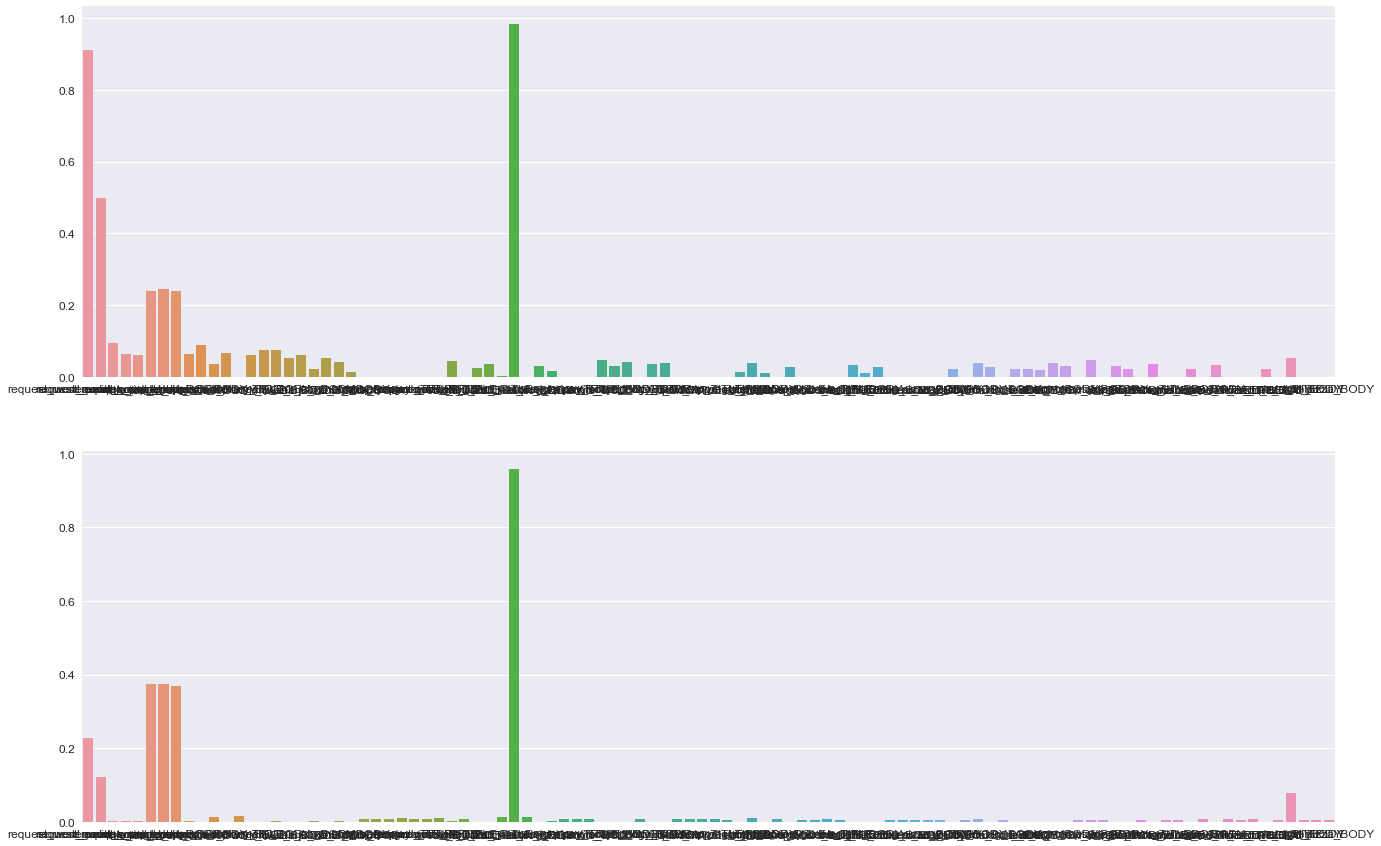

In [179]:
plt.figure(figsize=(20,15))
sns.set(font_scale=1.2)

plt.subplot(211)
sns.barplot(x=tf_cluster_0.drop('cluster',axis=1).columns,y=tf_cluster_0.drop('cluster',axis=1).mean())
plt.subplot(212)
sns.barplot(x=tf_cluster_1.drop('cluster',axis=1).columns,y=tf_cluster_1.drop('cluster',axis=1).mean())


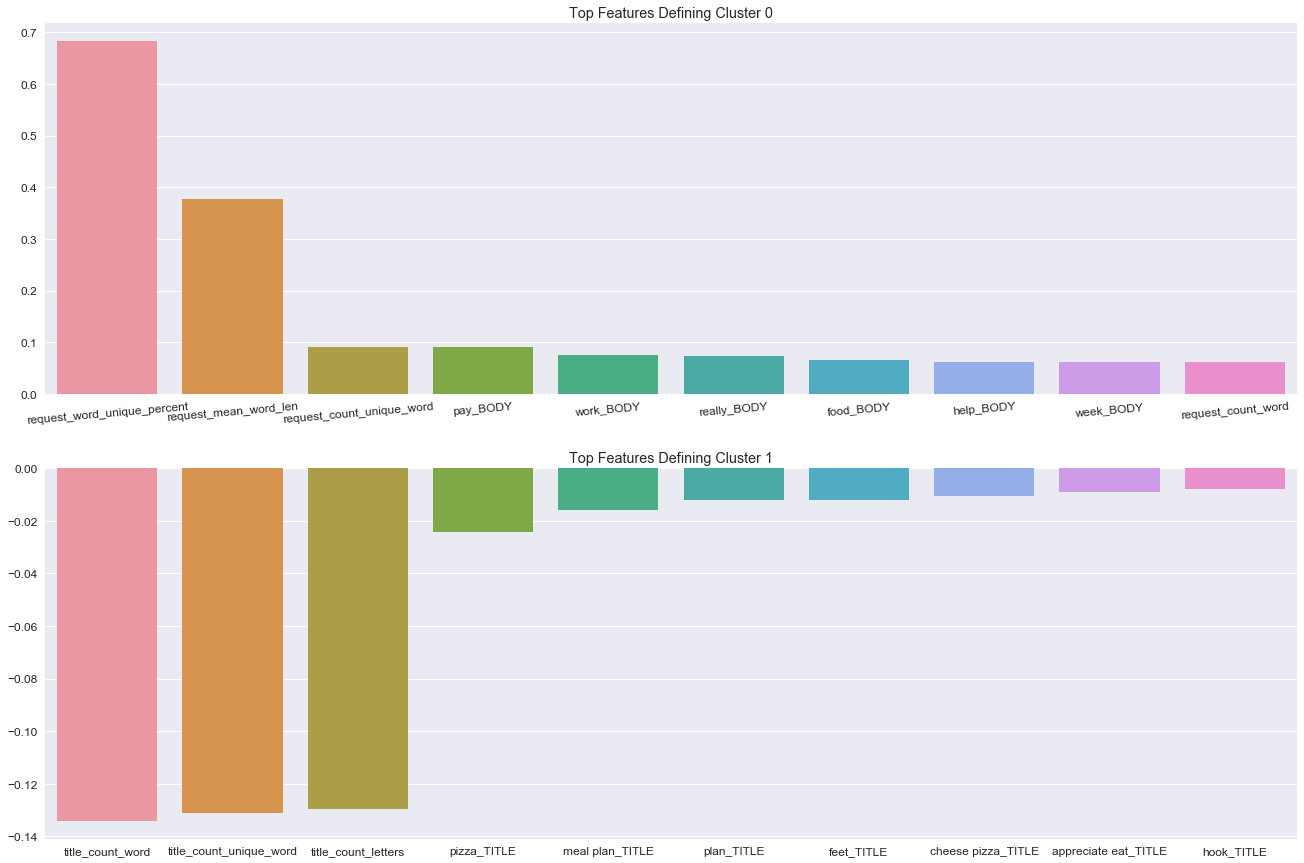

In [194]:
cluster_diff=tf_cluster_0.mean()-tf_cluster_1.mean()
cluster_diff=cluster_diff.sort_values(ascending=False)[:-1]
plt.figure(figsize=(20,15))
plt.subplot(211)
plt.title('Top Features Defining Cluster 0')
sns.barplot(x=cluster_diff.index[:10],y=cluster_diff[:10])
plt.xticks(rotation=5)

plt.subplot(212)
plt.title('Top Features Defining Cluster 1')
sns.barplot(x=cluster_diff.sort_values(ascending=True).index[:10],y=cluster_diff.sort_values(ascending=True)[:10])

In [195]:
cluster_diff

request_word_unique_percent    0.682979
request_mean_word_len          0.376599
request_count_unique_word      0.090715
pay_BODY                       0.089966
work_BODY                      0.075353
really_BODY                    0.073500
food_BODY                      0.066423
help_BODY                      0.062440
week_BODY                      0.061743
request_count_word             0.061723
money_BODY                     0.061513
request_count_letters          0.060353
make_BODY                      0.053021
job_BODY                       0.052577
come_BODY                      0.046345
break_BODY                     0.043316
new_BODY                       0.042282
days_BODY                      0.041384
like_BODY                      0.040480
try_BODY                       0.038746
able_BODY                      0.038648
today_BODY                     0.036047
tomorrow_BODY                  0.035717
forward_BODY                   0.035014
think_BODY                     0.034311


In [ ]:
sns.barplot(x=tf_cluster_1.drop('cluster',axis=1).columns,y=tf_cluster_1.drop('cluster',axis=1).mean())